# Sorptivity calculations
## M. Vanclooster 08/03/18

In this file we evaluate  the sorptivity and calculate infiltration using the Philip infiltration model (cite Philip)

\begin{equation}
    I = S\sqrt{t}+At
\end{equation}

We evaluate the sorptivity with the following equation:

\begin{equation}
    S(\theta,\theta_i)=\sqrt{\int_{\theta_s}^{\theta_i}\left(\theta_s+\theta-2\theta_i\right) D(\theta) d\theta}
\end{equation}

We start again by defininig our soil hydraulic parameters and hydraulic functions 

In [111]:
import os
import numpy as np
import scipy as sc
from matplotlib import pyplot as plt
from scipy.integrate import quad
%matplotlib inline

In [112]:
theta_s=0.4
theta_r=0.05
alfa=0.001 #(1/cm)
n=2.2
lamda=0.5
ks=10#  (cm/day)

In [113]:
def vgmod(ths,thr,alfa,n,h):
    m=1-1/n
    th=thr+(ths-thr)/(1+(alfa*h)**n)**m
    return th
def kmod(ths,thr,n,ks,lam,th):
    se=(th-thr)/(ths-thr)
    m=1-1/n
    k=ks*se**(lam)*( 1-( 1-se**(1/m)))**2 
    return k
def cmod(ths,thr,alfa,n,h):
    c=-n*(alfa*h)**n*(-1 + 1/n)*(-thr + ths)*((alfa*h)**n + 1)**(-1 + 1/n)/(h*((alfa*h)**n + 1))
    return c

We evaluate these functions for a set of possible values:

In [114]:
pf = np.arange(0, 7, 0.1)
h = 10**pf
theta=vgmod(theta_s,theta_r,alfa,n,h)
k=kmod(theta_s,theta_r,n,ks,lamda,theta)
c=cmod(theta_s,theta_r,alfa,n,h)
d=k/c

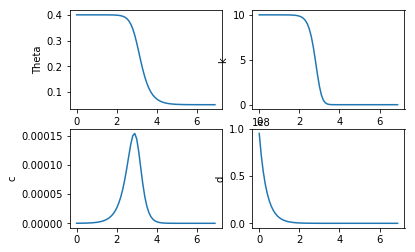

In [115]:
plt.subplot(2,2,1)
plt.plot(pf,theta);
plt.ylabel('Theta')
plt.subplot(2,2,2)
plt.plot(pf,k);
plt.ylabel('k')
plt.subplot(2,2,3)
plt.plot(pf,c);
plt.ylabel('c')
plt.subplot(2,2,4)
plt.plot(pf,d);
plt.ylabel('d')



Subsequently,we solve the integral in the formula of the sorptivity numerically, using Gaussian quadrature.  We define a function allowing to calculate the integrand in terms of different initial water contents, which we subsequently integrate numerically. 

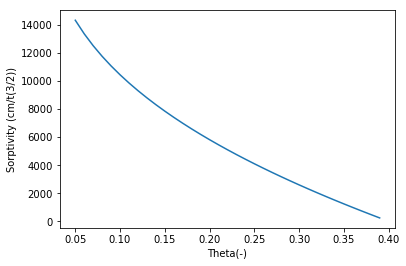

In [116]:
def integrand (h,ths,thr,alfa,n,ks,lam,thi):
    m=1-1/n
    th=thr+(ths-thr)/(1+(alfa*h)**n)**m
    se=(th-thr)/(ths-thr)
    k=ks*se**(lam)*( 1-( 1-se**(1/m)))**2 
    c=-n*(alfa*h)**n*(-1 + 1/n)*(-thr + ths)*((alfa*h)**n + 1)**(-1 + 1/n)/(h*((alfa*h)**n + 1))
    d=k/c
    return (ths+th-2*thi)*d

thi=np.arange(theta_r,theta_s,0.01)
s=35*[0]
inte=35*[0]

for i in range(0,35):
    inte[i]=quad(integrand,thi[i],theta_s, args=(theta_s,theta_r,alfa,n,ks,lamda,thi[i]))
    s[i]=np.sqrt(inte[i])
        
sn=np.asarray(S)
sn[:,0]
plt.plot(thi,sn[:,0])
plt.ylabel('Sorptivity (cm/t(3/2))')
plt.xlabel('Theta(-)')

This allows us to calculate infiltration curves for different initial water contents.

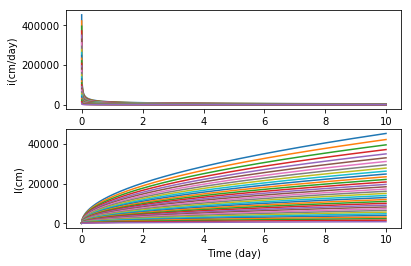

In [117]:
time=np.arange(0.001,10,0.01)
inf_cum = 35*[0]
inf_ins = 35*[0]
for i in range(0,35):
    inf_cum[i]=sn[i,0]*np.sqrt(time)+ks*2/3*time
    inf_ins[i]=sn[i,0]/np.sqrt(time)+ks*2/3 
    plt.subplot(2,1,1)
    plt.plot(time,inf_ins[i])
    plt.xlabel('Time (day)')
    plt.ylabel('i(cm/day)')
    plt.subplot(2,1,2)
    plt.plot(time,inf_cum[i])
    plt.xlabel('Time (day)')
    plt.ylabel('I(cm)')
